In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## The ProShares ETF Product

***1. “Alternative ETFs”***   
Describe the two types of investments referenced by this term.

<span style="color:#00008B">**Solution:** 
See Figure 1 of the case. Real estate, commodities, precious metals, currencies, volatility, private equity. 
</span>

***2. Hedge Funds.***  
(a)Using just the information in the case, what are two measures by which hedge funds are an attractive investment? 

<span style="color:#00008B">**Solution:** 
As seen in Exhibit 1, slide 9-10, the HFRI has a much higher SR than the S&P500 (.84 vs .41) , as well as a significantly smaller drawdown. Slide 7 also emphasizes that the HFRI is not perfectly correlated to equities and bonds, so it provides diversification at the portfolio level.
</span>

(b)What are the main benefits of investing in hedge funds via an ETF instead of directly? 

<span style="color:#00008B">**Solution:** 
See slide 13 of Exhibit 1, for a summary as given by ProShares. Undoubtedly, the ETF charges lower fees, provides more liquidity, opens access beyond institutional and high-net-worth investors. Furthermore, the investment does not have the idiosyncratic risk of a single fund, subject to that single fund's management, legal risks, etc. Of course, there are drawbacks to investing in the ETF instead of a single fund. Namely, the single fund may deliver excess returns (alpha) via specialized information, market access, skill, etc.
</span>

***3. The Benchmarks.***  
(a) Explain as simply as possible how HFRI, MLFM, MLFM-ES, and HDG differ in their construction and purpose.  

<span style="color:#00008B">**Solution:** 
See Footnote7 on Page 3. HFRI was designed to reflect the collective performance of hedge funds through an equally weighted composite of over 2,000 constituent hedge funds that were available to accredited investors.    
</span>
<br>
<span style="color:#00008B">
See slide 16 of Exhibit 1 and Page 5. MLFM targets a high correlation to the HFRI. There were six factors in the original Merrill Lynch Factor Model: S&P 500 (U.S. large-cap stocks), Russell 2000 (U.S. small- cap stocks), MSCI EAFE (developed stock markets), MSCI Emerging Markets, the Eurodollar/U.S. dollar exchange rate, and the three-month Eurodollar Deposit yields. 
</span>
<br>
<span style="color:#00008B">  
See Page 5 of the case. MLFM-ES is an updated version of MLFM such that the six index components are tradable. The MLFM-ES substituted three-month Eurodollar deposit yields with U.S. Treasury Bills and the dollar/euro exchange rates with ProShares UltraShort Euro (EUO). It has a nearly perfect correlation to MLFM. 
</span>
<br>
<span style="color:#00008B">    
See Page 5 and Exhibit 2 Factor Models. HDG seeks to track the performance of MLFM-ES to strive for a high correlation to hedge fund beta, thus it has the same factors as MLFM-ES.   
</span>

(b)How well does the Merrill Lynch Factor Model (MLFM) track the HFRI?  

<span style="color:#00008B">**Solution:** 
Exhibit 1, slide 18 shows that MLFM to HFRI has a correlation of 0.90 through 2013.
</span>

(c)In which factor does the MLFM have the largest loading? (See a slide in Exhibit 1.)  

<span style="color:#00008B">**Solution:** 
By far, the largest factor loading is in t-bills. This is true throughout 2013 and 2014. See Exhibit 1, slides 19-20 for details.
</span>

(d)What are the main concerns you have for how the MLFM attempts to replicate the HFRI?  

<span style="color:#00008B">**Solution:** 
The factors used in the MLFM are highly correlated, which raises concerns about the factor weights. Also, the dynamic regression used to construct the weights on the six factors was a backward-looking exercise, thus it will always lag behind the changes in hedge fund style. 
</span>

***4. The HDG Product***   
(a) What does ProShares ETF, HDG, attempt to track? Is the tracking error small?  

<span style="color:#00008B">**Solution:** 
HDG tracks a modified version of the ML Factor Model, MLFM-ES. The Merrill Lynch Factor Model involves indexes which cannot be exactly traded. For that reason, ProShares created a traded version of the Factor Model which replaces non-traded indexes with liquid, traded securities.</span>

<span style="color:#00008B">Exhibit 1, slide 22 shows that this modified benchmark tracks the standard ML Factor Model with a correlation of 99.7% when looking at daily data from 2011-2013.</span>

<span style="color:#00008B">Exhibit 2 shows that HDG tracks this benchmark closely, though it does not report a numerical estimate.</span>

(b) HDG is, by construction, delivering beta for investors. Isn't the point of hedge funds to generate alpha? Then why would HDG be valuable?  

<span style="color:#00008B">**Solution:** HDG may be valuable by delivering complicated or expensive beta to investors. In that sense, a sophisticated \beta" could be valued as \alpha" by investors, especially if delivered in a low-cost ETF.</span>

<span style="color:#00008B">And even if HDG is delivering only accessible beta, it could be valuable to a portfolio through its ability to diversify against traditional equity and bond allocations, as shown in Exhibit 1 and discussed as a benefit of HFRI. And at ETF fees, this could be an efficient way of loading into these alternative exposures.</span>

(c) The fees of a typical hedge-fund are 2% on total assets plus 20% of excess returns if positive. HDG's expense ratio is roughly 1% on total assets. What would their respective net Sharpe Ratios be, assuming both have a gross excess returns of 10% and volatility of 20%?

<span style="color:#00008B">**Solution:** The gross returns of the underlying assets have a Sharpe Ratio of 0.50. Net of the 1% fee, the net SR for the ETF would then be 9/20 = 0.45. Net of fees, the hedge-fund has 6% excess returns, which leads to a Sharpe Ratio of 6/20 = 0.30.</span>

<span style="color:#00008B">Of course, this calculation is very simple, but it intends to illustrate that performance is sensitive to the high fees traditionally charged by hedge funds. In the numerical example above, the ETF delivers 90% of the asset-level Sharpe Ratio, while the Hedge Fund delivers 60% of the underlying asset Sharpe Ratio. Thus, though the ETF may miss some of the individual hedge-fund premia, it also has a lower hurdle rate given the lower fees.</span>

In [2]:
hf_data = pd.read_excel('data/proshares_analysis_data.xlsx', sheet_name = 'hedge_fund_series')
hf_data = hf_data.set_index('date')

factor_data = pd.read_excel('data/proshares_analysis_data.xlsx', sheet_name = 'merrill_factors')
factor_data = factor_data.set_index('date')

other_data = pd.read_excel('data/proshares_analysis_data.xlsx', sheet_name = 'other_data')
other_data = other_data.set_index('date')
other_data['SPY US Equity'] = factor_data['SPY US Equity']

In [3]:
def summary_stats(df, annual_fac):
    report = pd.DataFrame()
    report['Mean'] = df.mean() * annual_fac
    report['Vol'] = df.std() * np.sqrt(annual_fac)
    report['Sharpe'] = report['Mean'] / report['Vol']
    return round(report, 4)


In [4]:
def tail_risk_report(data, q):
    df = data.copy()
    df.index = data.index.date
    report = pd.DataFrame(columns = df.columns)
    
    report.loc['Skewness'] = df.skew()
    report.loc['Excess Kurtosis'] = df.kurtosis() - 3
    report.loc['VaR'] = df.quantile(q)
    report.loc['Expected Shortfall'] = df[df < df.quantile(q)].mean()
    
    cum_ret = (1 + df).cumprod()
    rolling_max = cum_ret.cummax()
    drawdown = (cum_ret - rolling_max) / rolling_max
    report.loc['Max Drawdown'] = drawdown.min()
    report.loc['MDD Start'] = None
    report.loc['MDD End'] = drawdown.idxmin()
    report.loc['Recovery Date'] = None
    
    for col in df.columns:
        report.loc['MDD Start', col] = (rolling_max.loc[:report.loc['MDD End', col]])[col].idxmax()
        recovery_df = (drawdown.loc[report.loc['MDD End', col]:])[col]
        # modify the threshold for recovery from 0 to 0.001
        try:
            report.loc['Recovery Date', col] = recovery_df[recovery_df >= 0].index[0]
            report.loc['Recovery period (days)'] = (report.loc['Recovery Date'] - report.loc['MDD Start']).dt.days

        except:
            report.loc['Recovery Date', col] = None
            report.loc['Recovery period (days)'] = None

    return round(report,4)

In [5]:
def reg_stats(df, annual_fac):
    reg_stats = pd.DataFrame(data = None, index = df.columns, columns = ['beta', 
                                                                         'Treynor Ratio', 
                                                                         'Information Ratio'])
    for col in df.columns:
        # Drop the NAs in y
        y = df[col].dropna()
        # Align the X with y 
        X = sm.add_constant(factor_data['SPY US Equity'].loc[y.index])
        reg = sm.OLS(y, X).fit()
        reg_stats.loc[col, 'beta'] = reg.params[1]
        reg_stats.loc[col, 'Treynor Ratio'] = (df[col].mean() * annual_fac) / reg.params[1]
        reg_stats.loc[col, 'Information Ratio'] = (reg.params[0] / reg.resid.std()) * np.sqrt(annual_fac)

    return reg_stats.astype(float).round(4)

In [6]:
def display_correlation(df,list_maxmin=True):
    
    corrmat = df.corr()
    #ignore self-correlation
    corrmat[corrmat==1] = None
    sns.heatmap(corrmat)

    if list_maxmin:
        corr_rank = corrmat.unstack().sort_values().dropna()
        pair_max = corr_rank.index[-1]
        pair_min = corr_rank.index[0]

        print(f'MIN Correlation pair is {pair_min}')
        print(f'MAX Correlation pair is {pair_max}')

# 2 Analyzing the Data

**1**. For the series in the “hedge fund series” tab, report the following summary statistics:

In [7]:
summary_stats(hf_data.join(factor_data['SPY US Equity']),12)

,Mean,Vol,Sharpe
HFRIFWI Index,0.0508,0.0615,0.8257
MLEIFCTR Index,0.0388,0.0538,0.7209
MLEIFCTX Index,0.0373,0.0537,0.6954
HDG US Equity,0.0281,0.0564,0.4984
QAI US Equity,0.0255,0.0455,0.5604
SPY US Equity,0.1475,0.1354,1.0900


**2.** For the series in the “hedge fund series” tab, calculate the following statistics related to tail- risk.

In [8]:
tail_risk_report(hf_data.join(factor_data['SPY US Equity']),0.05)

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity,SPY US Equity
Skewness,-1.109248,-0.186692,-0.171632,-0.179641,-0.545085,-0.394559
Excess Kurtosis,3.730109,-0.570516,-0.624403,-0.418346,-0.330447,-1.437449
VaR,-0.025311,-0.025527,-0.025629,-0.028529,-0.016172,-0.060906
Expected Shortfall,-0.038757,-0.032779,-0.032724,-0.034782,-0.026348,-0.079288
Max Drawdown,-0.115473,-0.0845,-0.083673,-0.088245,-0.075649,-0.194266
MDD Start,2019-12-31,2019-12-31,2019-12-31,2020-01-31,2019-12-31,2019-12-31
MDD End,2020-03-31,2020-03-31,2020-03-31,2020-03-31,2020-03-31,2020-03-31
Recovery Date,2020-08-31,2020-11-30,2020-11-30,2020-11-30,2020-07-31,2020-07-31
Recovery period (days),244,335,335,304,213,213


**3.** For the series in the “hedge fund series” tab, run a regression of each against SPY (found in the “merrill factors” tab.) Include an intercept. Report the following regression-based statistics:

In [9]:
reg_stats(hf_data,12)

,beta,Treynor Ratio,Information Ratio
HFRIFWI Index,0.3943,0.1288,-0.2420
MLEIFCTR Index,0.3594,0.1080,-0.6153
MLEIFCTX Index,0.3580,0.1043,-0.6713
HDG US Equity,0.3692,0.0761,-1.0106
QAI US Equity,0.2850,0.0894,-0.6873


4. Relative Performance  
Discuss the previous statistics, and what they tell us about...

(a) the differences between SPY and the hedge-fund series? 

<span style="color:#00008B">**Solution:**
The SPY has a higher mean, volatility, and Sharpe Ratio than that of all hedge-fund series. Also, the SPY has smaller tail risks in terms of VaR, and CVaR. Besides, all hedge-fund series have a negative information ratio, which indicates that they fail to beat the market. 
</span>

(b) which performs better between HDG and QAI.

<span style="color:#00008B">**Solution:**
Although HDG has a slightly higher mean return, it also has a higher volatility, so it has a smaller Sharpe Ratio than QAI. In addition, HDG contains more tail risks as it has higher VaR, CVaR, and Maximum Drawdown. The recovery period of HDG is also longer than that of QAI. QAI is also less correlated to the market(See the heat map below), and has a higher Treynor Ratio and Information Ratio. Overall, QAI performs better than HDG. 
</span>

(c) whether HDG and the ML series capture the most notable properties of HFRI.

<span style="color:#00008B">**Solution:**
Both HDG and the ML series fail to deliver the same high returns compendated with the high risk of HRFI. The HFRI also shows a very high excess kurtosis, but all of the hedge-fund series has a very small excess kurtosis. 
</span>


5. Report the correlation matrix for these assets.  
(a) Show the correlations as a heat map.  
(b) Which series have the highest and lowest correlations?

MIN Correlation pair is ('HDG US Equity', 'QAI US Equity')
MAX Correlation pair is ('MLEIFCTR Index', 'MLEIFCTX Index')


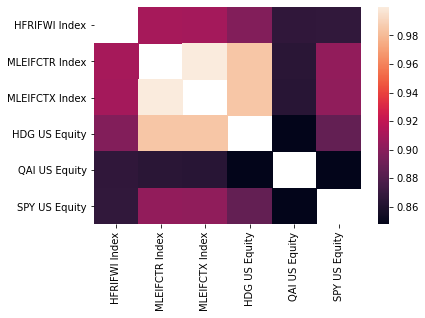

In [10]:
display_correlation(hf_data.join(factor_data['SPY US Equity']),True)

**6.** Replicate HFRI with the six factors listed on the “merrill factors” tab. Include a constant, and run the unrestricted regression

In [11]:
y = hf_data['HFRIFWI Index']
X = sm.add_constant(factor_data)
static_model = sm.OLS(y,X).fit()

(a) Report the intercept and betas.

In [12]:
static_model.params.to_frame('Regression Parameters')

,Regression Parameters
const,0.001147
SPY US Equity,0.072022
USGG3M Index,-0.400591
EEM US Equity,0.072159
EFA US Equity,0.106318
EUO US Equity,0.022431
IWM US Equity,0.130892


(b) Are the betas realistic position sizes, or do they require huge long-short positions?

<span style="color:#00008B">**Solution:**
The betas look like realistic position sizes. They do not require huge long-short positions.
</span>

(c) Report the R-squared.

In [13]:
round(static_model.rsquared,4)

0.8557

(d)Report the volatility of $\epsilon^{merr}$, (the tracking error.)


In [14]:
round(static_model.resid.std() * np.sqrt(12),4)

0.0234

7. Let’s examine the replication out-of-sample.

In [15]:
model = RollingOLS(y,X,window=60)
rolling_betas = model.fit().params.copy()
rolling_betas

,const,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
date,,,,,,,
2011-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-05-31,0.002788,0.075014,-1.534818,0.104951,0.097579,0.005371,0.147374
2021-06-30,0.002731,0.073925,-1.480456,0.105029,0.096860,0.003405,0.148293
2021-07-31,0.002791,0.068513,-1.495962,0.110204,0.094706,0.004556,0.151516


In [16]:
rep_IS = (rolling_betas * X).sum(axis=1,skipna=False)
rep_OOS = (rolling_betas.shift() * X).sum(axis=1,skipna=False)
replication = hf_data[['HFRIFWI Index']].copy()
replication['Static-IS-Int'] = static_model.fittedvalues
replication['Rolling-IS-Int'] = rep_IS
replication['Rolling-OOS-Int'] = rep_OOS

In [17]:
replication.corr()

,HFRIFWI Index,Static-IS-Int,Rolling-IS-Int,Rolling-OOS-Int
HFRIFWI Index,1.000000,0.925038,0.966793,0.944550
Static-IS-Int,0.925038,1.000000,0.992091,0.994047
Rolling-IS-Int,0.966793,0.992091,1.000000,0.995595
Rolling-OOS-Int,0.944550,0.994047,0.995595,1.000000


<AxesSubplot:xlabel='date'>

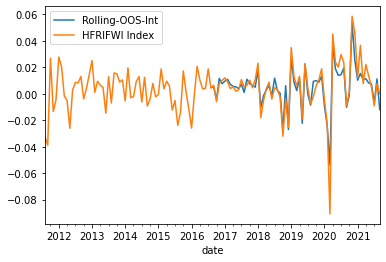

In [18]:
replication[['Rolling-OOS-Int','HFRIFWI Index']].plot()

How well does the out-of-sample replication perform with respect to the target?

<span style="color:#00008B">**Solution:**
The out-of-sample replication performs very well with respect to the target. It has a very high correlation to the HFRI. 
</span>

**8.** We estimated the replications using an intercept. Try the full-sample estimation, but this time without an intercept.

In [19]:
y = hf_data['HFRIFWI Index']
X = factor_data
static_model_noint = sm.OLS(y,X).fit()

(a) Report the regression beta. How does it compare to the estimated beta with an intercept, βˆmerr?

<span style="color:#00008B">**Solution:**
Without an intercept, the betas are almost identical, except the beta in the 3-month T-bills. The T-bills are such low volatility, they act almost like an intercept. Thus, the regression performance is very similar.
</span>

In [20]:
betas = pd.DataFrame(static_model.params,columns=['Yes Intercept']).T
betas.loc['No Intercept'] = static_model_noint.params
betas

,const,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
Yes Intercept,0.001147,0.072022,-0.400591,0.072159,0.106318,0.022431,0.130892
No Intercept,NaN,0.087505,0.334503,0.069936,0.101524,0.023479,0.128999


(b) the mean of the fitted value, $\check{r}^{hfri}$ . How does it compare to the mean of the HFRI? 

<span style="color:#00008B">**Solution:**
The mean of the fitted value is slightly smaller than the mean of the HFRI. 
</span>

In [21]:
print("The mean of the fitted value is", round(static_model_noint.fittedvalues.mean(),4)*12)

The mean of the fitted value is 0.0432


In [22]:
print("The mean of the HFRI is",round(hf_data['HFRIFWI Index'].mean(),4)*12)

The mean of the HFRI is 0.0504


(c) the correlations of the fitted values, $\check{r}^{hfri}$ to the HFRI. How does the correlation compare to that of the fitted values of $\hat{r}^{hfri}$?

<span style="color:#00008B">**Solution:**
The correlations of the fitted values of model without an intercept to the HFRI are quite high. This correlation are very similar to that of the fitted values of the model with an intercept. </span>


In [23]:
replication['Static-IS-NoInt'] = static_model_noint.fittedvalues
replication.corr()

,HFRIFWI Index,Static-IS-Int,Rolling-IS-Int,Rolling-OOS-Int,Static-IS-NoInt
HFRIFWI Index,1.000000,0.925038,0.966793,0.944550,0.924517
Static-IS-Int,0.925038,1.000000,0.992091,0.994047,0.999437
Rolling-IS-Int,0.966793,0.992091,1.000000,0.995595,0.990893
Rolling-OOS-Int,0.944550,0.994047,0.995595,1.000000,0.992507
Static-IS-NoInt,0.924517,0.999437,0.990893,0.992507,1.000000


Do you think Merrill and ProShares fit their replicators with an intercept or not?

<span style="color:#00008B">**Solution:**
Recall that if our porfolio is trying to deliver hedge-fund returns (including their mean and high SR)
via an ETF, then the replication should definitely not include an intercept in the regression.
It should make the replication factors match the mean, so that the investors in the ETF
match the mean, not just the variation of HFRI.</span>

<span style="color:#00008B">
However, if our porfolio is only trying to deliver a hedge, or a similar variation, then we should 
include an intercept, and accept that the replication will differ in mean returns by alpha
but will match variation anyway.</span>

<span style="color:#00008B">  
Overall, it would seem reasonable and necessary for the replication to attempt to deliver the
high mean returns of hedge funds in order to be attractive for investors. For that reason, we
expect Merrill and ProShares are not including an intercept when running their regressions
and setting their factor weights.</span>

# 3 Extensions

**1.** Merrill constrains the weights of each asset in its replication regression of HFRI. Try constraining your weights by re-doing 2.6.

(a) Use Non-Negative Least Squares (NNLS) instead of OLS.5

In [24]:
reg_nnls = LinearRegression(positive=True)
y = hf_data['HFRIFWI Index']
X = factor_data
# By default, fit_intercept is true so there's no need to add constant
nnls_model = reg_nnls.fit(X, y)
sum_index = list(factor_data.columns)
sum_index.append('constant')
coefs = np.append(nnls_model.coef_,nnls_model.intercept_)

nnls_reg_summary = pd.DataFrame(coefs,index = sum_index,columns = ['Regression Parameters'])
nnls_reg_summary

,Regression Parameters
SPY US Equity,0.071666
USGG3M Index,0.000000
EEM US Equity,0.071478
EFA US Equity,0.106558
EUO US Equity,0.022064
IWM US Equity,0.131764
constant,0.000954


(b) Go further by using a Generalized Linear Model to put separate interval constraints on
each beta, rather than simply constraining them to be non-negative.

skip.

**2**. Let’s decompose a few other targets to see if they behave as their name suggests.  
(a) Regress HEFA on the same style factors used to decompose HFRI. Does HEFA appear to be a currency-hedged version of EFA?

<span style="color:#00008B">**Solution:**
Yes, the beta for EFA US Equity is 0.9779, which is very close to 1. The beta for EUO US Equity is the second largest, which is 0.3099. Other betas are relatively small, except the beta for USGG3M Index is very negative, but it has a large p-value. Therefore, we can replicate HEFA very well using only EUO US Equity and EFA. 
</span>

In [25]:
y = other_data['HEFA US Equity'].dropna()
X = sm.add_constant(factor_data.loc[y.index])
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HEFA US Equity   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     490.4
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           3.74e-63
Time:                        15:42:38   Log-Likelihood:                 337.21
No. Observations:                  91   AIC:                            -660.4
Df Residuals:                      84   BIC:                            -642.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0010      0.001      1.136      0.259      -0.001       0.003
SPY US Equity     0.0340      0.041      0.823      0.413      -0.048       0.116
USGG3M Index     -0.4832      0.921     -0.525      0.601      -2.315       1.348
EEM US Equity    -0.0848      0.025     -3.409      0.001      -0.134      -0.035
EFA US Equity     0.9779      0.040     24.294      0.000       0.898       1.058
EUO US Equity     0.3099      0.019     16.440      0.000       0.272       0.347
IWM US Equity     0.0164      0.024      0.682      0.497      -0.031       0.064
==============================================================================
Omnibus:                       14.995   Durbin-Watson:                   2.253
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.812
Skew:                          -0.579   Prob(JB):                     3.36e-07
Kurtosis:                       5.554   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**(b)** Decompose TRVCI with the same style factors used to decompose HFRI. The TRVCI Index tracks venture capital funds–in terms of our styles, what best describes venture capital?

<span style="color:#00008B">**Solution:**
The venture capital fund is very sensitive to the market and the US treasury-bills indicated by the corresponding betas. This means that the venture capital performs well when the market and the economy are good. However, the p-val for the US treasury-bills beta is very high (0.597), so the beta estimate can be unreliable. 
</span>

In [26]:
y = other_data['TRVCI Index'].dropna()
X = sm.add_constant(factor_data.loc[y.index])
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TRVCI Index   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     37.57
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           6.18e-25
Time:                        15:42:38   Log-Likelihood:                 220.85
No. Observations:                 122   AIC:                            -427.7
Df Residuals:                     115   BIC:                            -408.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0040      0.005      0.818      0.415      -0.006       0.014
SPY US Equity     1.7351      0.246      7.052      0.000       1.248       2.222
USGG3M Index      2.9773      5.619      0.530      0.597      -8.153      14.107
EEM US Equity    -0.0882      0.138     -0.639      0.524      -0.361       0.185
EFA US Equity     0.1172      0.226      0.518      0.605      -0.331       0.566
EUO US Equity    -0.0202      0.106     -0.190      0.850      -0.231       0.190
IWM US Equity    -0.2905      0.150     -1.935      0.055      -0.588       0.007
==============================================================================
Omnibus:                        0.815   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.643
Skew:                          -0.178   Prob(JB):                        0.725
Kurtosis:                       3.016   Cond. No.                     1.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**(c)** TAIL is an ETF that tracks SPY, but that also buys put options to protect against market downturns. Calculate the statistics in questions 2.1-2.3 for TAIL. Does it seem to behave as indicated by this description? That is, does it have high correlation to SPY while delivering lower tail risk?

<span style="color:#00008B">**Solution:**
The TAIL does not seem to track the SPY well. It has a much lower and negative Sharpe Ratio, so the returns of TAIL are much worse than SPY. In terms of tail risks, it has a very high skewness and kurtosis. However, the VaR and the CVaR are slightly higher than then SPY, and this makes sense since it buys put options for protection. Besides, it has not recovered from the Maximum drawdown yet. We can conclude that it won't have high correlation to SPY. 
</span>

In [27]:
summary_stats(other_data[['TAIL US Equity','SPY US Equity']],12)

,Mean,Vol,Sharpe
TAIL US Equity,-0.0452,0.1259,-0.3594
SPY US Equity,0.1475,0.1354,1.0900


In [28]:
tail_risk_report(other_data[['TAIL US Equity','SPY US Equity']],0.05)

,TAIL US Equity,SPY US Equity
Skewness,1.369272,-0.394559
Excess Kurtosis,0.217345,-1.437449
VaR,-0.042977,-0.060906
Expected Shortfall,-0.060999,-0.079288
Max Drawdown,-0.215843,-0.194266
MDD Start,2020-03-31,2019-12-31
MDD End,2021-05-31,2020-03-31
Recovery Date,None,2020-07-31
Recovery period (days),NaN,213.0


In [29]:
reg_stats(other_data[['TAIL US Equity','SPY US Equity']],12)

,beta,Treynor Ratio,Information Ratio
TAIL US Equity,-0.6514,0.0694,0.8745
SPY US Equity,1.0000,0.1475,-0.5445


***3. Geared ETFs***   
(a) Explain conceptually why Levered ETFs may track their index well for a given day but diverge over time. How is this exacerbated in volatile periods like 2008?

<span style="color:#00008B">**Solution:**
Even though the tracking error of Levered ETFs in a day is small, the error can become huge over time because of the effect of compounding. During the volatile periods, the Levered ETFs need to be reset daily, so the compounding effect would exacerbate the tracking error. 
</span>

(b) Analyze SPXU and UPRO relative to SPY.

i. Analyze them with the statistics from 2.1-2.3. Do these two ETFs seem to live up to their names?

<span style="color:#00008B">**Solution:**
The mean returns of SPXU and UPRO seem to live up to their names, but in terms of Sharpe Ratio, they do not. Also, the two ETFs have more tail risk in terms of VaR and CVaR. The market beta for SPXU is -2.5034 instead of -3, but the market beta for UPRO is 3.1421, which is very close to 3 as claimed. 
</span>

In [30]:
summary_stats(other_data[['SPXU US Equity','UPRO US Equity','SPY US Equity']], 12)

,Mean,Vol,Sharpe
SPXU US Equity,-0.4980,0.3608,-1.3803
UPRO US Equity,0.3886,0.4270,0.9103
SPY US Equity,0.1475,0.1354,1.0900


In [31]:
tail_risk_report(other_data[['SPXU US Equity','UPRO US Equity','SPY US Equity']], 0.05)

,SPXU US Equity,UPRO US Equity,SPY US Equity
Skewness,0.431867,-0.554275,-0.394559
Excess Kurtosis,-1.498177,-0.542429,-1.437449
VaR,-0.187543,-0.188916,-0.060906
Expected Shortfall,-0.250446,-0.255533,-0.079288
Max Drawdown,-0.998063,-0.604438,-0.194266
MDD Start,2011-09-30,2019-12-31,2019-12-31
MDD End,2021-08-31,2020-03-31,2020-03-31
Recovery Date,None,2020-12-31,2020-07-31
Recovery period (days),NaN,366.0,213.0


In [32]:
reg_stats(other_data[['SPXU US Equity','UPRO US Equity','SPY US Equity']], 12)

,beta,Treynor Ratio,Information Ratio
SPXU US Equity,-2.5034,0.1989,-1.0384
UPRO US Equity,3.1421,0.1237,-2.0074
SPY US Equity,1.0000,0.1475,-0.5445


<AxesSubplot:xlabel='date'>

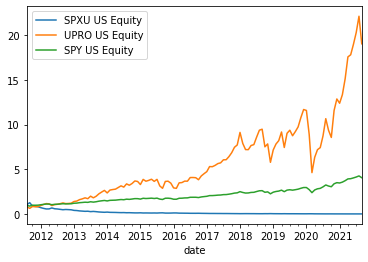

In [33]:
(1+other_data[['SPXU US Equity','UPRO US Equity','SPY US Equity']]).cumprod().plot()

In conclusion, I think "levered" ETFs can be a good choice while the overall market is performing well as it can deliver much desirable returns. However, when the market is volatile, the "levered" ETFs are very likely to underperform and it contains more tail risk as well. 